#Clothes classification with CNN (Deep Learning)
Óscar Poblete Sáenz <br>
Course: Introduction to Artificial Intelligence <br>
Teacher: Elizabeth Guevara Martinez<br>
Universidad Anáhuac <br>

The goal is to develop a model to detect and classify types of garments from images.
There are 48,000 training images and 10,000 test images that belong to **10 classes or labels**:

#Classes <br>

0 T-shirt/top<br>
1 Trouser<br>
2 Pullover<br>
3 Dress<br>
4 Coat<br>
5 Sandal<br>
6 Shirt<br>
7 Sneaker<br>
8 Bag<br>
9 Ankle boot<br>

#Sources: 

The original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist


In [1]:
# Import libraries
import tensorflow.keras # Tensorflow
import numpy as np # Linear algebra
import pandas as pd # Data manipulation and analysis
import matplotlib.pyplot as plt # Graph
import random

In [2]:
# Test data
test_df=pd.read_csv('fashion-mnist_test.csv')

# Convert to floats
test_data=np.array(test_df,dtype='float32')

# Data size
test_data.shape

(10000, 785)

In [3]:
# Split values from the test set
x_test=test_data[:,1:]/255 # It's already an array, no need to use iloc. Save all values except labels
# Divide by 255 to normalize

Image of the garment


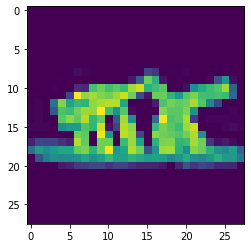

In [8]:
# Adjust vector dimensions. from 784 to 28
image=x_test[random.randint(0,1000),:].reshape((28,28)) # Select random image

# Show image
print("Image of the garment")
plt.imshow(image)

In [9]:
# Load model obtained in fashion_CNN.ipynb
model = tensorflow.keras.models.load_model('/content/modelFashion.h5')

In [10]:
# CNN architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [11]:
# Input layer
model.input_shape

(None, 28, 28, 1)

In [12]:
# Generate an array to save images and test the model
data = np.ndarray(shape=(1, 28, 28), dtype=np.float32)
# Load the image in an array
data[0] = image

In [13]:
# Make prediction
prediction=model.predict(data)[0]
print(prediction)

1/1 [==============================] - 0s 346ms/step
[1.8436001e-05 1.1498943e-06 6.2535313e-05 1.5913089e-05 2.1115262e-05
 9.9858367e-01 8.9185796e-06 6.9060181e-05 1.2191399e-03 8.3952656e-08]


In [14]:
# Load labels
# Separating with line break to make a list of values
with open('labels.txt', 'r') as f:
  labels = f.read().split('\n')

In [15]:
# Print model prediction
index = np.argmax(prediction) # Take the maximum of the probabilities to obtain the class
# It will tell us the most probable class for the image we loaded
print("The most likely class is '{}' with a confidence of {}%".format(labels[index], np.round(prediction[index]*100, 3)))

The most likely class is '5 Sandal' with a confidence of 99.858%
